In [4]:
HEAD_PATH = "d:/intern"

In [5]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [6]:
DATA_PATH = HEAD_PATH + "/pkl tick/"

- set working directory

In [7]:
import os
os.chdir(DATA_PATH)

- number of cores

In [8]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16


- get working directory

In [9]:
os.getcwd()

'd:\\intern\\pkl tick'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [10]:
product_list = ["btc.usd.td", "eth.usd.td", "btc.usdt", "eth.usdt"]
product = product_list[0]

- directory of the product's data

In [11]:
dire = DATA_PATH + product
dire

'd:/intern/pkl tick/btc.usd.td'

- get all available data

In [12]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 1061

1061

- we can see that there are 1061 days
- all of the products have the same trading days
- so we just take a as an example
- get first several dates

In [13]:
all_dates[:6]
# ['2017-06-16.pkl',
#  '2017-06-17.pkl',
#  '2017-06-18.pkl',
#  '2017-06-19.pkl',
#  '2017-06-20.pkl',
#  '2017-06-21.pkl']

['2017-06-16.pkl',
 '2017-06-17.pkl',
 '2017-06-18.pkl',
 '2017-06-19.pkl',
 '2017-06-20.pkl',
 '2017-06-21.pkl']

- get last several dates

In [14]:
all_dates[-6:]
# ['2020-05-18.pkl',
#  '2020-05-19.pkl',
#  '2020-05-20.pkl',
#  '2020-05-21.pkl',
#  '2020-05-22.pkl',
#  '2020-05-23.pkl']

['2020-05-18.pkl',
 '2020-05-19.pkl',
 '2020-05-20.pkl',
 '2020-05-21.pkl',
 '2020-05-22.pkl',
 '2020-05-23.pkl']

- specify a date

In [15]:
date = "2018-04-11"

- loading data set

In [16]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [17]:
data.columns

# Index(['time', 'ask_0_p', 'ask_0_v', 'ask_1_p', 'ask_1_v', 'ask_2_p',
#        'ask_2_v', 'ask_3_p', 'ask_3_v', 'ask_4_p', 'ask_4_v', 'ask_5_p',
#        'ask_5_v', 'ask_6_p', 'ask_6_v', 'ask_7_p', 'ask_7_v', 'ask_8_p',
#        'ask_8_v', 'ask_9_p', 'ask_9_v', 'bid_0_p', 'bid_0_v', 'bid_1_p',
#        'bid_1_v', 'bid_2_p', 'bid_2_v', 'bid_3_p', 'bid_3_v', 'bid_4_p',
#        'bid_4_v', 'bid_5_p', 'bid_5_v', 'bid_6_p', 'bid_6_v', 'bid_7_p',
#        'bid_7_v', 'bid_8_p', 'bid_8_v', 'bid_9_p', 'bid_9_v', 'last',
#        'timestamp', 'volume', 'ask.qty', 'bid.qty', 'bid', 'ask', 'wpr',
#        'next.bid', 'next.ask', 'wpr.ret', 'ret', 'intra.time'],
#       dtype='object')

Index(['time', 'ask_0_p', 'ask_0_v', 'ask_1_p', 'ask_1_v', 'ask_2_p',
       'ask_2_v', 'ask_3_p', 'ask_3_v', 'ask_4_p', 'ask_4_v', 'ask_5_p',
       'ask_5_v', 'ask_6_p', 'ask_6_v', 'ask_7_p', 'ask_7_v', 'ask_8_p',
       'ask_8_v', 'ask_9_p', 'ask_9_v', 'bid_0_p', 'bid_0_v', 'bid_1_p',
       'bid_1_v', 'bid_2_p', 'bid_2_v', 'bid_3_p', 'bid_3_v', 'bid_4_p',
       'bid_4_v', 'bid_5_p', 'bid_5_v', 'bid_6_p', 'bid_6_v', 'bid_7_p',
       'bid_7_v', 'bid_8_p', 'bid_8_v', 'bid_9_p', 'bid_9_v', 'last',
       'timestamp', 'volume', 'ask.qty', 'bid.qty', 'bid', 'ask', 'wpr',
       'next.bid', 'next.ask', 'wpr.ret', 'ret', 'intra.time'],
      dtype='object')

In [18]:
data.iloc[0:10,0:10]

# time 	ask_0_p 	ask_0_v 	ask_1_p 	ask_1_v 	ask_2_p 	ask_2_v 	ask_3_p 	ask_3_v 	ask_4_p
# 0 	2018-04-11T00:00:00.162324Z 	6824.5 	815335.0 	6825.0 	60823.0 	6825.5 	113649.0 	6826.0 	29145.0 	6826.5
# 1 	2018-04-11T00:00:02.148714Z 	6824.5 	1015340.0 	6825.0 	60823.0 	6825.5 	113649.0 	6826.0 	29145.0 	6826.5
# 2 	2018-04-11T00:00:07.209195Z 	6824.5 	946739.0 	6825.0 	161475.0 	6825.5 	256886.0 	6826.0 	27145.0 	6826.5
# 3 	2018-04-11T00:00:08.497459Z 	6824.5 	946739.0 	6825.0 	161475.0 	6825.5 	256886.0 	6826.0 	27145.0 	6826.5
# 4 	2018-04-11T00:00:09.252452Z 	6824.5 	238783.0 	6825.0 	49964.0 	6825.5 	113649.0 	6826.0 	139645.0 	6826.5
# 5 	2018-04-11T00:00:09.864387Z 	6824.5 	345945.0 	6825.0 	48475.0 	6825.5 	115049.0 	6826.0 	141645.0 	6826.5
# 6 	2018-04-11T00:00:10.605125Z 	6824.5 	694944.0 	6825.0 	60475.0 	6825.5 	198989.0 	6826.0 	87705.0 	6826.5
# 7 	2018-04-11T00:00:11.815878Z 	6824.5 	269844.0 	6825.0 	60475.0 	6825.5 	198989.0 	6826.0 	58330.0 	6826.5
# 8 	2018-04-11T00:00:14.485123Z 	6824.5 	269844.0 	6825.0 	60475.0 	6825.5 	198989.0 	6826.0 	58330.0 	6826.5
# 9 	2018-04-11T00:00:15.135179Z 	6824.5 	392719.0 	6825.0 	49475.0 	6825.5 	115089.0 	6826.0 	29830.0 	6826.5

,time,ask_0_p,ask_0_v,ask_1_p,ask_1_v,ask_2_p,ask_2_v,ask_3_p,ask_3_v,ask_4_p
0,2018-04-11T00:00:00.162324Z,6824.5,815335.0,6825.0,60823.0,6825.5,113649.0,6826.0,29145.0,6826.5
1,2018-04-11T00:00:02.148714Z,6824.5,1015340.0,6825.0,60823.0,6825.5,113649.0,6826.0,29145.0,6826.5
2,2018-04-11T00:00:07.209195Z,6824.5,946739.0,6825.0,161475.0,6825.5,256886.0,6826.0,27145.0,6826.5
3,2018-04-11T00:00:08.497459Z,6824.5,946739.0,6825.0,161475.0,6825.5,256886.0,6826.0,27145.0,6826.5
4,2018-04-11T00:00:09.252452Z,6824.5,238783.0,6825.0,49964.0,6825.5,113649.0,6826.0,139645.0,6826.5
5,2018-04-11T00:00:09.864387Z,6824.5,345945.0,6825.0,48475.0,6825.5,115049.0,6826.0,141645.0,6826.5
6,2018-04-11T00:00:10.605125Z,6824.5,694944.0,6825.0,60475.0,6825.5,198989.0,6826.0,87705.0,6826.5
7,2018-04-11T00:00:11.815878Z,6824.5,269844.0,6825.0,60475.0,6825.5,198989.0,6826.0,58330.0,6826.5
8,2018-04-11T00:00:14.485123Z,6824.5,269844.0,6825.0,60475.0,6825.5,198989.0,6826.0,58330.0,6826.5
9,2018-04-11T00:00:15.135179Z,6824.5,392719.0,6825.0,49475.0,6825.5,115089.0,6826.0,29830.0,6826.5


In [19]:
data.iloc[0:10,10:20]
#  	ask_4_v 	ask_5_p 	ask_5_v 	ask_6_p 	ask_6_v 	ask_7_p 	ask_7_v 	ask_8_p 	ask_8_v 	ask_9_p
# 0 	22807.0 	6827.0 	471198.0 	6827.5 	11750.0 	6828.0 	87803.0 	6828.5 	41219.0 	6829.0
# 1 	22807.0 	6827.0 	471198.0 	6827.5 	11750.0 	6828.0 	87803.0 	6828.5 	41219.0 	6829.0
# 2 	22807.0 	6827.0 	316698.0 	6827.5 	12150.0 	6828.0 	28403.0 	6828.5 	1619.0 	6829.0
# 3 	22807.0 	6827.0 	316698.0 	6827.5 	12150.0 	6828.0 	28403.0 	6828.5 	1619.0 	6829.0
# 4 	82738.0 	6827.0 	308899.0 	6827.5 	76750.0 	6828.0 	26403.0 	6828.5 	1619.0 	6829.0
# 5 	52738.0 	6827.0 	326899.0 	6827.5 	76750.0 	6828.0 	27403.0 	6828.5 	1619.0 	6829.0
# 6 	22738.0 	6827.0 	396899.0 	6827.5 	11750.0 	6828.0 	27403.0 	6828.5 	1619.0 	6829.0
# 7 	35738.0 	6827.0 	396899.0 	6827.5 	11750.0 	6828.0 	26403.0 	6828.5 	1619.0 	6829.0
# 8 	35738.0 	6827.0 	396899.0 	6827.5 	11750.0 	6828.0 	26403.0 	6828.5 	1619.0 	6829.0
# 9 	6738.0 	6827.0 	377599.0 	6827.5 	42150.0 	6828.0 	26403.0 	6828.5 	32419.0 	6829.0

,ask_4_v,ask_5_p,ask_5_v,ask_6_p,ask_6_v,ask_7_p,ask_7_v,ask_8_p,ask_8_v,ask_9_p
0,22807.0,6827.0,471198.0,6827.5,11750.0,6828.0,87803.0,6828.5,41219.0,6829.0
1,22807.0,6827.0,471198.0,6827.5,11750.0,6828.0,87803.0,6828.5,41219.0,6829.0
2,22807.0,6827.0,316698.0,6827.5,12150.0,6828.0,28403.0,6828.5,1619.0,6829.0
3,22807.0,6827.0,316698.0,6827.5,12150.0,6828.0,28403.0,6828.5,1619.0,6829.0
4,82738.0,6827.0,308899.0,6827.5,76750.0,6828.0,26403.0,6828.5,1619.0,6829.0
5,52738.0,6827.0,326899.0,6827.5,76750.0,6828.0,27403.0,6828.5,1619.0,6829.0
6,22738.0,6827.0,396899.0,6827.5,11750.0,6828.0,27403.0,6828.5,1619.0,6829.0
7,35738.0,6827.0,396899.0,6827.5,11750.0,6828.0,26403.0,6828.5,1619.0,6829.0
8,35738.0,6827.0,396899.0,6827.5,11750.0,6828.0,26403.0,6828.5,1619.0,6829.0
9,6738.0,6827.0,377599.0,6827.5,42150.0,6828.0,26403.0,6828.5,32419.0,6829.0


In [20]:
data.iloc[0:10,20:]

# ask_9_v 	bid_0_p 	bid_0_v 	bid_1_p 	bid_1_v 	bid_2_p 	bid_2_v 	bid_3_p 	bid_3_v 	bid_4_p 	... 	ask.qty 	bid.qty 	bid 	ask 	wpr 	next.bid 	next.ask 	wpr.ret 	ret 	intra.time
# 0 	164044.0 	6824.0 	158990.0 	6823.5 	757667.0 	6823.0 	525.0 	6822.5 	145.0 	6822.0 	... 	181777.3 	110937.2 	6824.0 	6824.5 	6824.189497 	6824.0 	6824.5 	0.000000 	0.000000e+00 	00:00:00
# 1 	164044.0 	6824.0 	158990.0 	6823.5 	757667.0 	6823.0 	525.0 	6822.5 	145.0 	6822.0 	... 	201777.8 	110937.2 	6824.0 	6824.5 	6824.177377 	6824.0 	6824.5 	-0.012120 	-1.776006e-06 	00:00:02
# 2 	165676.0 	6824.0 	39524.0 	6823.5 	717556.0 	6823.0 	525.0 	6822.5 	145.0 	6822.0 	... 	193959.8 	95168.2 	6824.0 	6824.5 	6824.164578 	6824.0 	6824.5 	-0.012800 	-1.875614e-06 	00:00:07
# 3 	165676.0 	6824.0 	109524.0 	6823.5 	717556.0 	6823.0 	525.0 	6822.5 	145.0 	6822.0 	... 	193959.8 	102168.2 	6824.0 	6824.5 	6824.172507 	6824.0 	6824.5 	0.007929 	1.161878e-06 	00:00:08
# 4 	168544.0 	6824.0 	149697.0 	6823.5 	720556.0 	6823.0 	525.0 	6822.5 	145.0 	6822.0 	... 	120699.4 	105685.5 	6824.0 	6824.5 	6824.233420 	6824.0 	6824.5 	0.060913 	8.926042e-06 	00:00:09
# 5 	170544.0 	6824.0 	137257.0 	6823.5 	732556.0 	6823.0 	525.0 	6822.5 	145.0 	6822.0 	... 	130706.7 	104441.5 	6824.0 	6824.5 	6824.222076 	6824.0 	6824.5 	-0.011344 	-1.662317e-06 	00:00:09
# 6 	168544.0 	6824.0 	75566.0 	6823.5 	732747.0 	6823.0 	2475.0 	6822.5 	145.0 	6822.0 	... 	167106.6 	99005.4 	6824.0 	6824.5 	6824.186022 	6824.0 	6824.5 	-0.036054 	-5.283233e-06 	00:00:10
# 7 	184246.0 	6824.0 	136784.0 	6823.5 	732747.0 	6823.0 	2475.0 	6822.5 	145.0 	6822.0 	... 	124429.3 	105137.3 	6824.0 	6824.5 	6824.228991 	6824.0 	6824.5 	0.042969 	6.296525e-06 	00:00:11
# 8 	184246.0 	6824.0 	130784.0 	6823.5 	732747.0 	6823.0 	2475.0 	6822.5 	145.0 	6822.0 	... 	124429.3 	104537.3 	6824.0 	6824.5 	6824.228281 	6824.0 	6824.5 	-0.000710 	-1.040662e-07 	00:00:14
# 9 	183246.0 	6824.0 	169516.0 	6823.5 	717102.0 	6823.0 	4275.0 	6822.5 	145.0 	6822.0 	... 	125566.8 	107855.9 	6824.0 	6824.5 	6824.231031 	6824.0 	6824.5 	0.002751 	4.030676e-07 	00:00:15

# 10 rows × 34 columns

,ask_9_v,bid_0_p,bid_0_v,bid_1_p,bid_1_v,bid_2_p,bid_2_v,bid_3_p,bid_3_v,bid_4_p,...,ask.qty,bid.qty,bid,ask,wpr,next.bid,next.ask,wpr.ret,ret,intra.time
0,164044.0,6824.0,158990.0,6823.5,757667.0,6823.0,525.0,6822.5,145.0,6822.0,...,181777.3,110937.2,6824.0,6824.5,6824.189497,6824.0,6824.5,0.000000,0.000000e+00,00:00:00
1,164044.0,6824.0,158990.0,6823.5,757667.0,6823.0,525.0,6822.5,145.0,6822.0,...,201777.8,110937.2,6824.0,6824.5,6824.177377,6824.0,6824.5,-0.012120,-1.776006e-06,00:00:02
2,165676.0,6824.0,39524.0,6823.5,717556.0,6823.0,525.0,6822.5,145.0,6822.0,...,193959.8,95168.2,6824.0,6824.5,6824.164578,6824.0,6824.5,-0.012800,-1.875614e-06,00:00:07
3,165676.0,6824.0,109524.0,6823.5,717556.0,6823.0,525.0,6822.5,145.0,6822.0,...,193959.8,102168.2,6824.0,6824.5,6824.172507,6824.0,6824.5,0.007929,1.161878e-06,00:00:08
4,168544.0,6824.0,149697.0,6823.5,720556.0,6823.0,525.0,6822.5,145.0,6822.0,...,120699.4,105685.5,6824.0,6824.5,6824.233420,6824.0,6824.5,0.060913,8.926042e-06,00:00:09
5,170544.0,6824.0,137257.0,6823.5,732556.0,6823.0,525.0,6822.5,145.0,6822.0,...,130706.7,104441.5,6824.0,6824.5,6824.222076,6824.0,6824.5,-0.011344,-1.662317e-06,00:00:09
6,168544.0,6824.0,75566.0,6823.5,732747.0,6823.0,2475.0,6822.5,145.0,6822.0,...,167106.6,99005.4,6824.0,6824.5,6824.186022,6824.0,6824.5,-0.036054,-5.283233e-06,00:00:10
7,184246.0,6824.0,136784.0,6823.5,732747.0,6823.0,2475.0,6822.5,145.0,6822.0,...,124429.3,105137.3,6824.0,6824.5,6824.228991,6824.0,6824.5,0.042969,6.296525e-06,00:00:11
8,184246.0,6824.0,130784.0,6823.5,732747.0,6823.0,2475.0,6822.5,145.0,6822.0,...,124429.3,104537.3,6824.0,6824.5,6824.228281,6824.0,6824.5,-0.000710,-1.040662e-07,00:00:14
9,183246.0,6824.0,169516.0,6823.5,717102.0,6823.0,4275.0,6822.5,145.0,6822.0,...,125566.8,107855.9,6824.0,6824.5,6824.231031,6824.0,6824.5,0.002751,4.030676e-07,00:00:15


- plot the price

In [21]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["last"].values);

In [22]:
range_ = (data["intra.time"] >="01:00:00") & (data["intra.time"]<"23:00:00") 

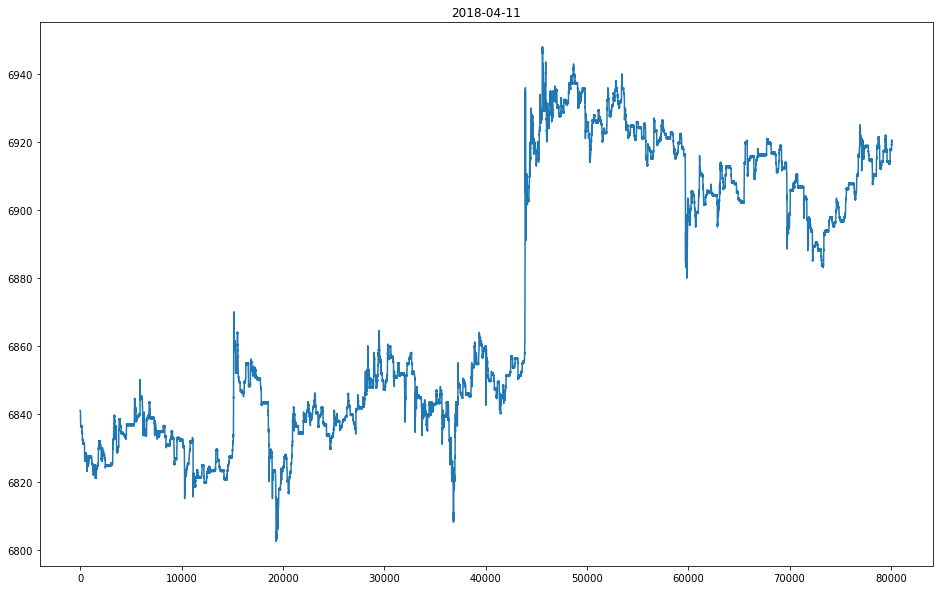

In [23]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["last"][range_].values);

In [24]:
def save(data, path):
    serialized = cPickle.dumps(data)
    with gzip.open(path, 'wb', compresslevel=1) as file_object:
        file_object.write(serialized)

In [25]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [273]:
data = load(DATA_PATH+product+"/"+all_dates[0])

In [297]:
## clean bitmex data
def clean_crypto_data(date, product, level):
    data = load(DATA_PATH + product+"/"+date)
    data["intra.time"] = np.array(list(map(lambda x: x[11:19] ,data["time"])))
    data["ask.qty"] = data[list(map(lambda x:"ask_"+str(x)+"_v", range(level)))].sum(axis=1)/level
    data["bid.qty"] = data[list(map(lambda x:"bid_"+str(x)+"_v", range(level)))].sum(axis=1)/level
    data["bid"] = data["bid_0_p"]
    data["ask"] = data["ask_0_p"]
    data["wpr"] = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])
    next_bid = data["bid"][1:]  
    next_bid = np.array(next_bid.append(data["bid"][-1:]))
    data["next.bid"] = next_bid
    next_ask = data["ask"][1:]  
    next_ask = next_ask.append(data["ask"][-1:])
    data["next.ask"] = np.array(next_ask)
    pre_wpr = data["wpr"].shift(1)
    pre_wpr[0] = data["wpr"][0]
    data["wpr.ret"] = data["wpr"]-pre_wpr
    data["ret"] = np.log(data["wpr"])-np.log(pre_wpr)
    save(data, DATA_PATH + product+"/"+date)
    

In [298]:
%%time
for product in ["btc.usd.td", "eth.usd.td"]:
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, all_dates, clean_crypto_data, product=product, level=10)
## Wall time: 7min 4s


Wall time: 7min 4s


In [299]:
%%time
for product in ["btc.usdt", "eth.usdt"]:
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, all_dates, clean_crypto_data, product=product, level=20)
    
# Wall time: 7min 35s


Wall time: 7min 35s


- plot price change

- plot price log return

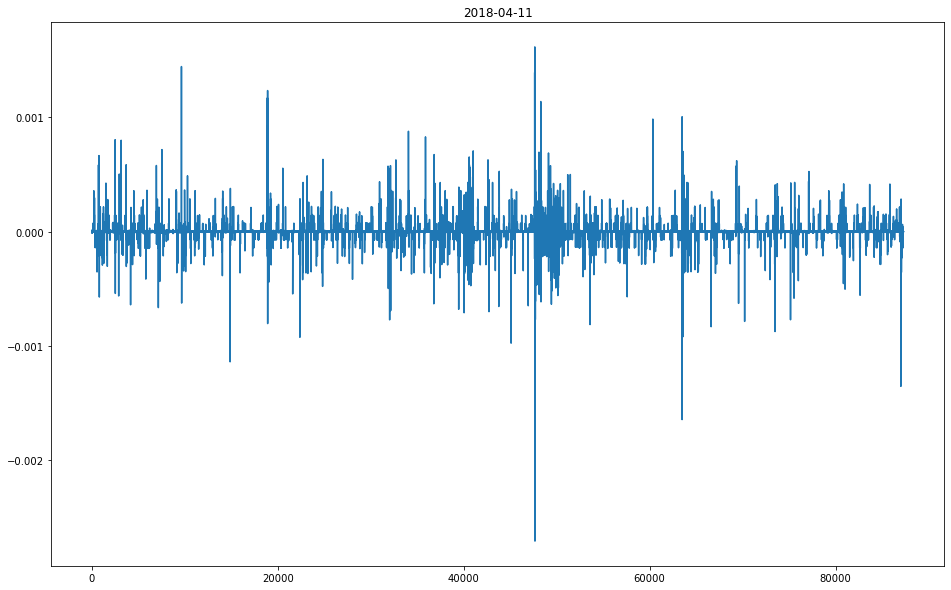

In [314]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [315]:
sum(data['ret']>0)/len(data)
## 0.48273452979510495

0.48273452979510495

- count the number of falling ticks

In [317]:
sum(data['ret']<0)/len(data)
## 0.4892169550925979

0.4892169550925979

In [319]:
sum(data['ret']==0)/len(data)
## 0.028048515112297136

##    count the number of total ticks



0.028048515112297136

- count the number of total ticks

In [320]:
len(data)
## 87313

87313

- formula to calculate wpr:

In [321]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [322]:
wpr.head()
# 0    6824.189497
# 1    6824.177377
# 2    6824.164578
# 3    6824.172507
# 4    6824.233420
# dtype: float64

0    6824.189497
1    6824.177377
2    6824.164578
3    6824.172507
4    6824.233420
dtype: float64

In [323]:
data["wpr"].head()
# 0    6824.189497
# 1    6824.177377
# 2    6824.164578
# 3    6824.172507
# 4    6824.233420
# Name: wpr, dtype: float64

0    6824.189497
1    6824.177377
2    6824.164578
3    6824.172507
4    6824.233420
Name: wpr, dtype: float64

In [324]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

In [362]:
range_ = (data["intra.time"] >="01:00:00") & (data["intra.time"]<"23:00:00") 
good = np.array(range_)

In [363]:
data["good"] = good

- stationary test for return series

- load related package

In [365]:
import statsmodels.tsa.stattools as ts

In [366]:
result = ts.adfuller(data["ret"][data["good"]], maxlag=int(pow(len(data["ret"][data["good"]])-1,(1/3))), regression='ct', autolag=None)
result
# (-41.77396074558912,
#  0.0,
#  43,
#  80063,
#  {'1%': -3.9588830791388196,
#   '5%': -3.4105448382257495,
#   '10%': -3.127082295180388})
## for this test the smaller the value the more stationary it is
## so it's stationary

(-41.77396074558912,
 0.0,
 43,
 80063,
 {'1%': -3.9588830791388196,
  '5%': -3.4105448382257495,
  '10%': -3.127082295180388})

In [368]:
result = ts.kpss(data["ret"][data["good"]], regression='c', lags=int(3*math.sqrt(len(data["ret"][data["good"]]))/13))
result

# (0.06053744451283559,
#  0.1,
#  65,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## for KPSS test, small value means level stationary, large value means trend
    ## its p-value is 0.1 so it's stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.06053744451283559,
 0.1,
 65,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [369]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [371]:
sum(data["ret"][0:120])
## 3.0834566455695267e-06

3.0834566455695267e-06

In [373]:
ret_120.iloc[0]
## 3.0834566455695267e-06

3.0834566455695267e-06

- plot the price movements of 120 ticks

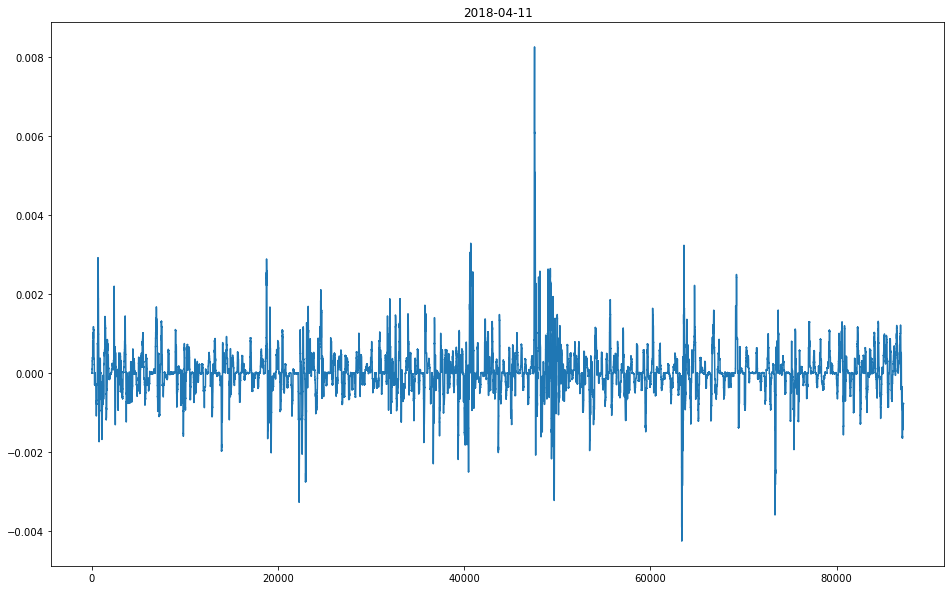

In [374]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [375]:
len(ret_120)
## 87194

87194

In [376]:
len(data)
## 87313

87313

In [377]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0) & data["good"])[119:]

In [379]:
len(ret_120)
## 65847

87194

In [380]:
ret_120.iloc[np.where(range_120)]

# 3721    -0.000724
# 3841    -0.000614
# 3961    -0.000109
# 4081    -0.000748
# 4201     0.000273
#            ...   
# 83161    0.000391
# 83281   -0.000838
# 83401   -0.000019
# 83521   -0.000064
# 83641    0.000576
# Name: ret, Length: 667, dtype: float64

3721    -0.000724
3841    -0.000614
3961    -0.000109
4081    -0.000748
4201     0.000273
           ...   
83161    0.000391
83281   -0.000838
83401   -0.000019
83521   -0.000064
83641    0.000576
Name: ret, Length: 667, dtype: float64

- test whether ret.120 is stationary

In [381]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-8.942964397698928,
#  4.885495713168213e-13,
#  8,
#  658,
#  {'1%': -3.972594640577458,
#   '5%': -3.417183369789282,
#   '10%': -3.1309886272580587})

(-8.942964397698928,
 4.885495713168213e-13,
 8,
 658,
 {'1%': -3.972594640577458,
  '5%': -3.417183369789282,
  '10%': -3.1309886272580587})

In [382]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', lags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.08206295615653249,
#  0.1,
#  5,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.08206295615653249,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [383]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

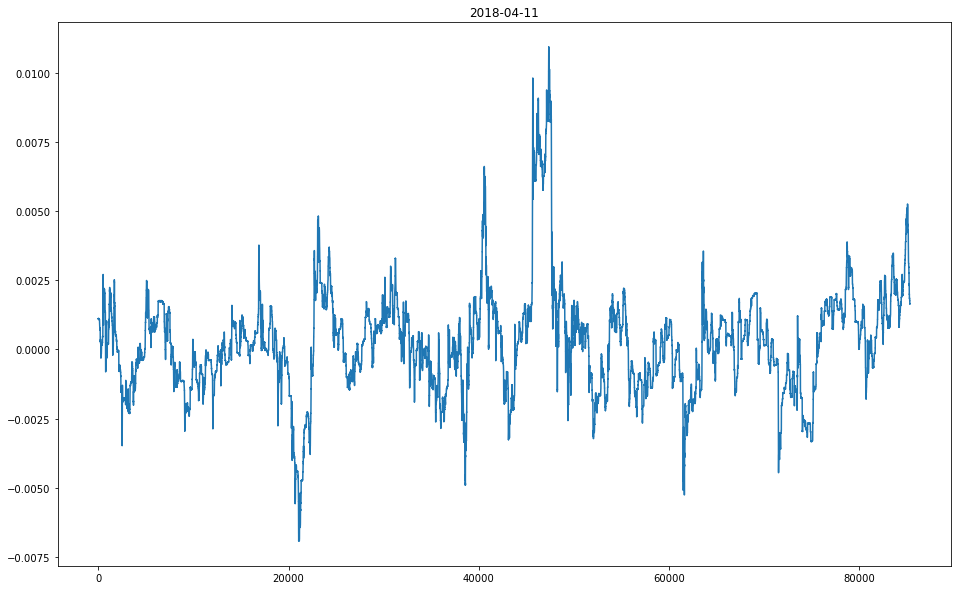

In [384]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [386]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0) & (data["good"]))
## 40

40

- So there are too few points to test for stationary

In [387]:
import pandas as pd
import _pickle as cPickle
import gzip

- there may be too few data
- we can check for more days

In [388]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range_ = (data["intra.time"] >="01:00:00") & (data["intra.time"]<"23:00:00") 
    good = np.array(range_)
    range = ((np.mod(np.arange(0, len(data)),period)==0) & good)[(period-1):]
    return ret.iloc[np.where(range)]


In [389]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [390]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 1min 29s

Wall time: 25 s


''

In [391]:
from itertools import chain 

In [392]:
ret_long = list(chain.from_iterable(result)) 

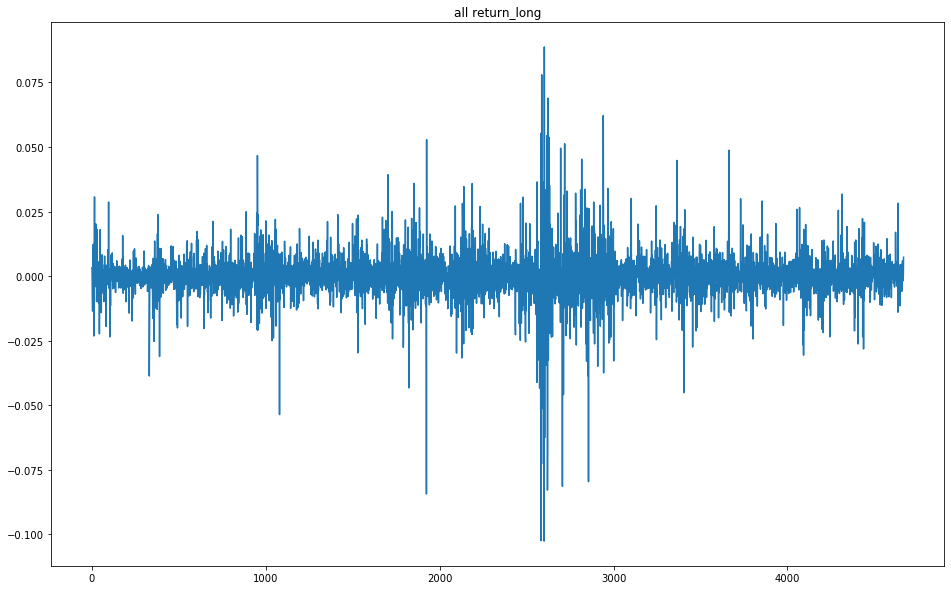

In [393]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [394]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-15.628947583840983,
#  1.288422474795716e-22,
#  16,
#  4652,
#  {'1%': -3.9607173811520027,
#   '5%': -3.4114341841115707,
#   '10%': -3.1276059855454155})

## it's still stationary

(-15.628947583840983,
 1.288422474795716e-22,
 16,
 4652,
 {'1%': -3.9607173811520027,
  '5%': -3.4114341841115707,
  '10%': -3.1276059855454155})

In [395]:
result = ts.kpss(ret_long, regression='c', lags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.15781719801555066,
#  0.1,
#  15,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# ## p-value is 0.1 so it's stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.15781719801555066,
 0.1,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [396]:
threshold = 0.001
len(ret_long)
# 4669

4669


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [398]:
sum(np.array(ret_long)>threshold)
## 2031

2031

- number of ticks below negetive threshold, to be short position

In [400]:
sum(np.array(ret_long)< -threshold)
## 1946

1946

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [401]:
## backtest method: signal value decides position
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, tranct_ratio=False, threshold=0.001, tranct=0.21, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data) ## original data
    range_ = (ori_data["intra.time"] >="01:00:00") & (ori_data["intra.time"]<"23:00:00") 
    good = np.array(range_)
    data=ori_data[good] ## the middle day of original data
    n_bar = len(data)  ## number of bars
    unit = np.std(data["ret"]) ## standard deviation of return
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True) ## future return, used as signal
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1 ## signal>thre, position =1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1 ## signal< -thre, position = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0 ## close position before the end of day
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = np.array(change_pos>0)
    change_sell = np.array(change_pos<0)
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct) ## buy price, use next ask, tranct cost use notional*ratio
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct) ## sell price use next bid
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct ## fix tranct cost per share
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [402]:
import dask
from dask import compute, delayed

get_daily_pnl_fast(all_dates[0], product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.001, tranct=7.5e-4)
# OrderedDict([('date', '2019-11-27.pkl'),
#              ('final.pnl', -1066.6482500000857),
#              ('turnover', 3079530.06775),
#              ('num', 212),
#              ('hld.period', 106071)])

OrderedDict([('date', '2019-11-27.pkl'),
             ('final.pnl', -1066.6482500000857),
             ('turnover', 3079530.06775),
             ('num', 212),
             ('hld.period', 106071)])

- Then we use it for all days

In [403]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.001, tranct=7.5e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 26.5 s

Wall time: 26.5 s


- Now we can use a function to check its performance

In [406]:
from collections import OrderedDict
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index("date", inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat["final.pnl"].cumsum()
    date_str = [n[0:10] for n in row_names]
    date_format = [pd.to_datetime(d) for d in date_str]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat["num"].mean()
    if num==0:
        return;
    if (stat["final.pnl"].std()==0):
        sharpe = 0
    else:
        sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
   
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])/spread
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-46.188484,-0.995567,-1.004453,0.0,183.201149,-7.547517,540.060545


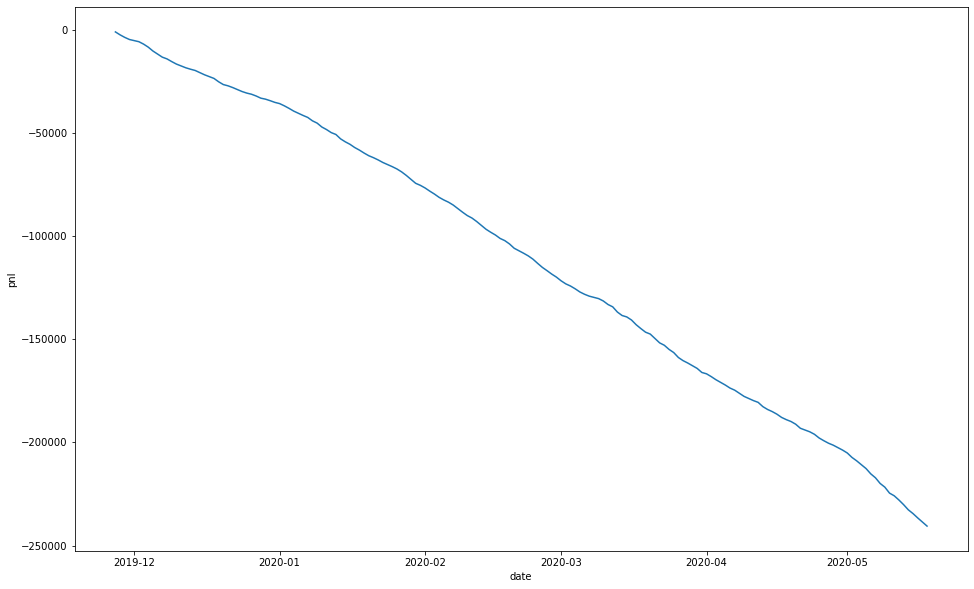

In [407]:
pd.DataFrame(get_performance(result, 1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-46.188484 	-0.995567 	-1.004453 	0.0 	183.201149 	-7.547517 	540.060545



- we can see it's really bad
- we can try increasing threshold

In [408]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.01, tranct=7.5e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 26 s


Wall time: 26 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-10.958797,-1.006272,-0.993767,0.103448,48.45977,-5.275308,209.385792


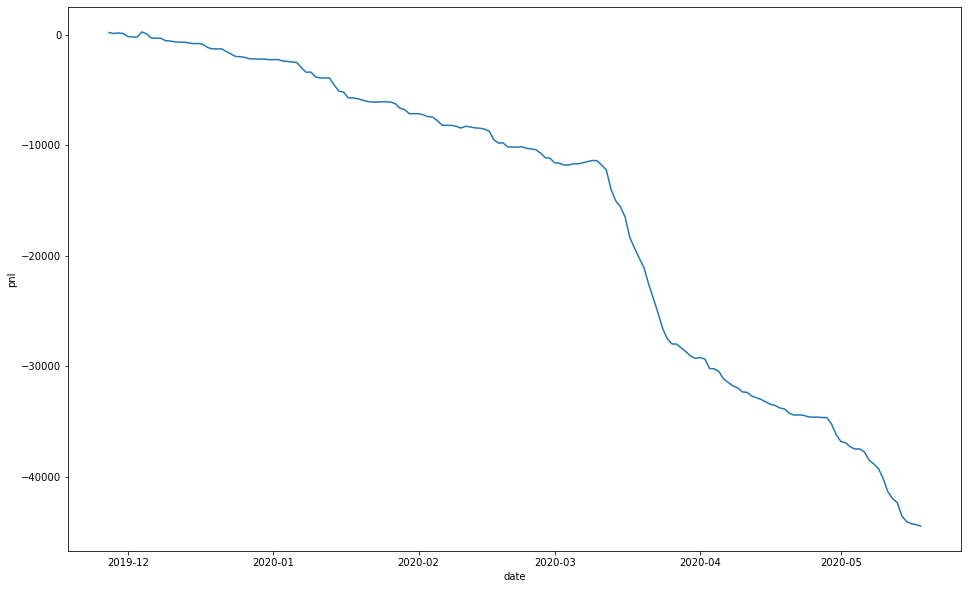

In [409]:
pd.DataFrame(get_performance(result_2), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-10.958797 	-1.006272 	-0.993767 	0.103448 	48.45977 	-5.275308 	209.385792

In [410]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.02, tranct=7.5e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 26.2 s
    

Wall time: 26.2 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-6.566978,-1.027269,-0.973454,0.074713,18.304598,-4.218169,156.06562


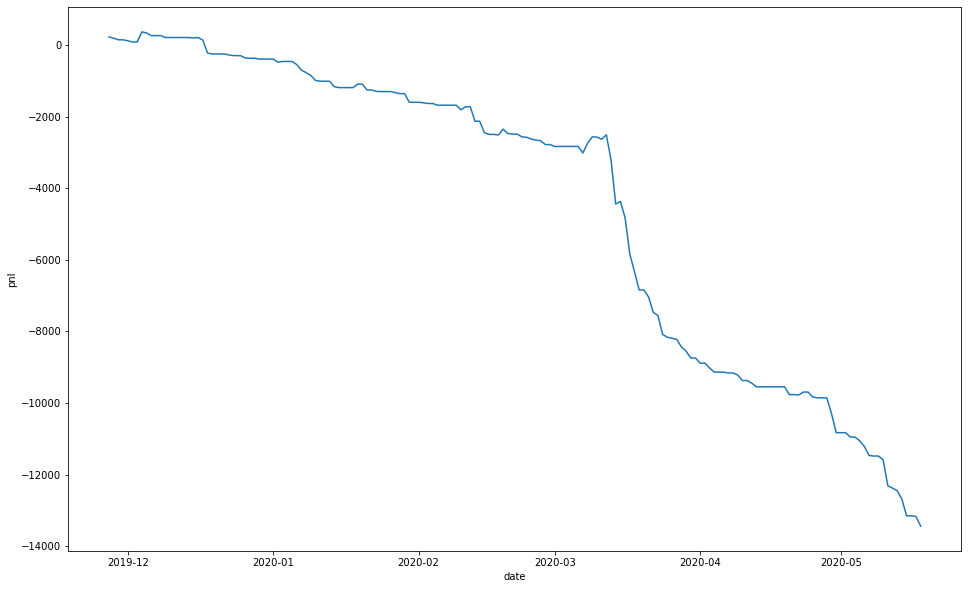

In [411]:
pd.DataFrame(get_performance(result_3, 1), index=[0])

# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-6.566978 	-1.027269 	-0.973454 	0.074713 	18.304598 	-4.218169 	156.06562

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [415]:
## backtest use good method
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    range_ = (data["intra.time"] >="01:00:00") & (data["intra.time"]<"23:00:00") 
    good = np.array(range_)
    data = data[good].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1 #
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1## if signal==1, position_pos=1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0  ## if ret< -threshold, position_pos=0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1 ## if signal==-1, position_neg=-1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0 ## if ret> threshold, position_neg=0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg ## total position
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [416]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.001, tranct=7.5e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 31.1 s

Wall time: 31.1 s


- the col names and row names are opposite

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,20.291816,0.0,inf,1.0,54.902299,8.489488,2452.7472


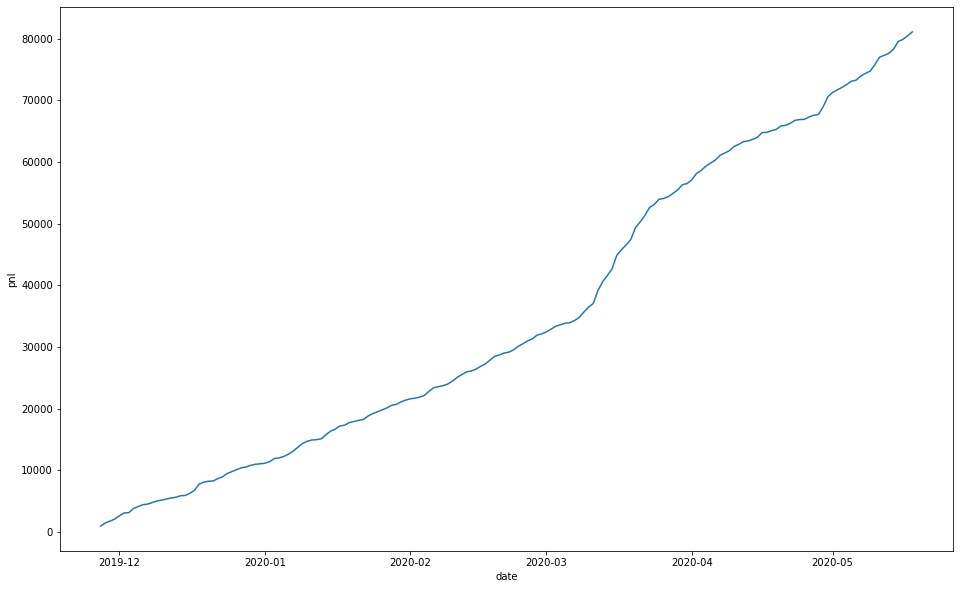

In [417]:
pd.DataFrame(get_performance(result_4,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	20.291816 	0.0 	inf 	1.0 	54.902299 	8.489488 	2452.7472


- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [426]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.002, tranct=7.5e-4, noise=0.1)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 30 s

Wall time: 32.3 s


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,20.6345,0.0,inf,1.0,33.551724,0.003074,3989.257965


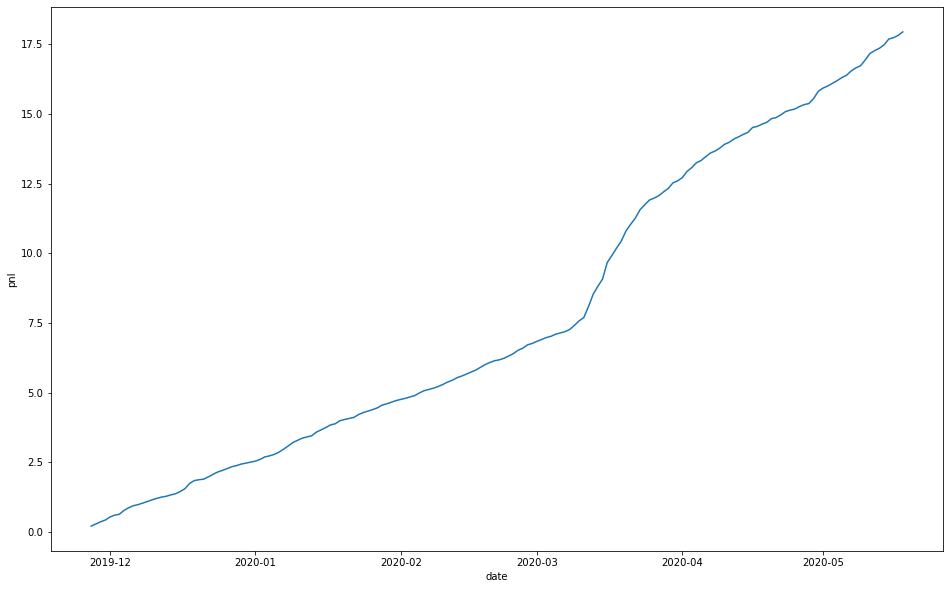

In [427]:
pd.DataFrame(get_performance(result_5,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	20.6345 	0.0 	inf 	1.0 	33.551724 	0.003074 	3989.257965

In [430]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.002, tranct=7.5e-4, noise=5)
    result_6 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 31.9 s

Wall time: 31.3 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-1.112051,-1.469268,-0.680611,0.936782,172.166667,-0.000737,780.802684


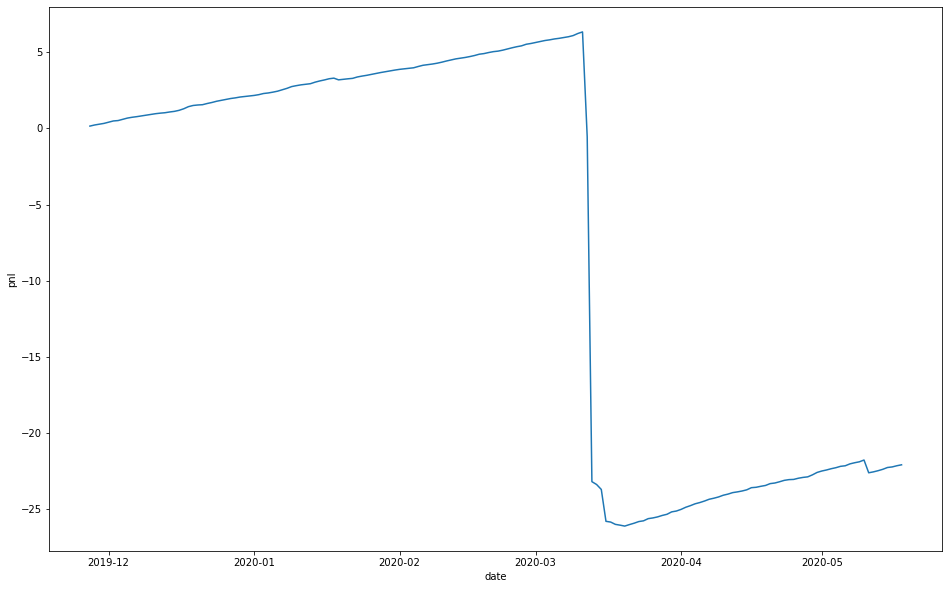

In [431]:
pd.DataFrame(get_performance(result_6,1), index=[0])


- Previous method use fix size to trade, 
- now we suppose fix notional value of each trade

In [421]:
## daily pnl of fixed capital
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False,threshold=0.001, tranct=1.1e-4, noise=0, notional=False):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    range_ = (data["intra.time"] >="01:00:00") & (data["intra.time"]<"23:00:00") 
    good = np.array(range_)
    data = data[good].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    pre_pos = position_pos.shift(1)
    position_pos[(position_pos==1) & (pre_pos==1)] = np.nan ## holding positio rather than trade, change to nan
    position_pos[(position_pos==1)] = 1/data["next.ask"][(position_pos==1)] ## use 1/price as trading volume
    position_pos.ffill(inplace=True) 
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    pre_neg = position_neg.shift(1)
    position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan  ## holding positio rather than trade, change to nan
    position_neg[(position_neg==-1)] = -1/data["next.bid"][(position_neg==-1)] ## use 1/price as trading volume
    position_neg.ffill(inplace=True) ## replace nan by trading volume
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0

    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

In [422]:
get_daily_pnl(all_dates[0], product="btc.usd.td", period=4096, tranct_ratio=True, threshold=0.001, tranct=7.5e-4, notional=True)

# OrderedDict([('date', '2019-11-27.pkl'),
#              ('final.pnl', 0.13385643105576406),
#              ('turnover', 122.05306556859432),
#              ('num', 61),
#              ('hld.period', 130494)])

OrderedDict([('date', '2019-11-27.pkl'),
             ('final.pnl', 0.13385643105576406),
             ('turnover', 122.05306556859432),
             ('num', 61),
             ('hld.period', 130494)])

In [424]:
 %%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="btc.usd.td", period=4096, tranct_ratio=True, 
                              threshold=0.001, tranct=7.5e-4, noise=0, notional=True)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 31.4 s

Wall time: 31.4 s


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,16.517335,0.0,inf,1.0,54.902299,0.001141,2452.7472


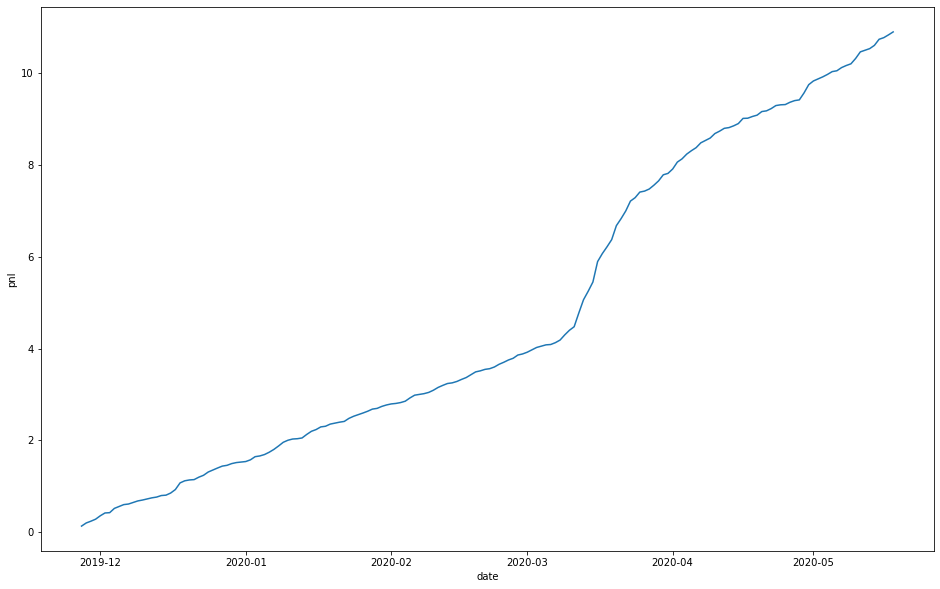

In [425]:
pd.DataFrame(get_performance(result,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	16.517335 	0.0 	inf 	1.0 	54.902299 	0.001141 	2452.7472


- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products and comapre their results